# ELE510 Image Processing with robot vision: LAB, Exercise 6, Image features detection.

**Purpose:** *To learn about the edges and corners features detection, and their descriptors.*

The theory for this exercise can be found in chapter 7 of the text book [1] and in appendix C in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)


**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
first. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

**Intensity edges** are pixels in the image where the intensity (or graylevel) function changes rapidly.

The **Canny edge detector** is a classic algorithm for detecting intensity edges in a grayscale image that relies on the gradient magnitude. The algorithm was developed by John F. Canny in 1986. It is a multi-stage algorithm that provides good and reliable detection.

**a)** Create the **Canny algorithm**, described at pag. 336 (alg. 7.1). For the last step (`EDGELINKING`) you can either use the algorithm 7.3 at page 338 or the `HYSTERESIS THRESHOLD` algorithm 10.3 described at page 451.
All the following images are taken from the text book [1].

![canny.png](images/canny.png)

![nonmaxsuppression.png](images/nonmaxsuppression.png)

![edgelinking.png](images/edgelinking.png)

**Remember:**

- Sigma (second parameter in the Canny algorithm) is not necessary for the calculation since the Sobel operator (in opencv) combines the Gaussian smoothing and differentiation, so the results is nore or less resistant to the noise. 
- We are defining the low and high thresholds manually in order to have a better comparison with the predefined opencv function. It is possible to extract the low and high thresholds automatically from the image but it is not required in this problem.

**b)** Test your algorithm with a image of your choice and compare your results with the predefined function in opencv: 

```python
cv2.Canny(img, t_low, t_high, L2gradient=True)
``` 
[Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny#canny).

### P.S. : 
<div class="alert alert-block alert-info">
The goal of this problem it is not to create a **perfect** replication of the algorithm in opencv, but to understand the various steps involved and to be able to extract the edges from an ima ge using these steps.
</div>

In [1]:
# Sobel operator to find the first derivate in the horizontal and vertical directions
def computeImageGradient(Im):
    # Sobel operator  to find the first derivate in the horizontal and vertical directions
    
    ## TODO: The default ksize is 3, try different values and comment the result 
    g_x = cv2.Sobel(Im, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
    g_y = cv2.Sobel(Im, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
    
    ############################
    # Calculate the magnitude and the gradient direction like it is performed during the assignment 4 (problem 2a)
    gradient_I, gradient_directions = cv2.cartToPolar(g_x, g_y)
    G_mag = gradient_I
    G_phase = gradient_directions
        
    return G_mag, G_phase


# when ksize=3, g_x
# ---------------------------------------
# [[  0.  -6.  -2. ...  -8. -24.   0.]
#  [  0.  -8.  -4. ...  -5. -20.   0.]
#  [  0. -11.  -7. ...   2. -13.   0.]
#  ...
#  [  0. 184.  17. ...  39.  60.   0.]
#  [  0. 185.  70. ...  49.  38.   0.]
#  [  0. 180. 102. ...   4.  22.   0.]]


# when ksize=3, g_y
# ---------------------------------------
# [[  0.   0.   0. ...   0.   0.   0.]
#  [  2.   0.  -4. ... -27. -20. -16.]
#  [  2.   1.  -1. ... -24. -17. -14.]
#  ...
#  [-44. -38. -11. ...  97. 146. 140.]
#  [ -4.  -9.  18. ... 177. 116. 100.]
#  [  0.   0.   0. ...   0.   0.   0.]]


# when ksize=15, g_x
# ---------------------------------------
# [[ 0.0000000e+00 -2.1012254e+07 -2.5673132e+07 ... -6.6597544e+07
#   -4.2876548e+07  0.0000000e+00]
#  [ 0.0000000e+00 -2.1984460e+07 -2.7325988e+07 ... -6.3477504e+07
#   -3.9984292e+07  0.0000000e+00]
#  [ 0.0000000e+00 -2.2881130e+07 -2.9006768e+07 ... -5.5792848e+07
#   -3.2984064e+07  0.0000000e+00]
#  ...
#  [ 0.0000000e+00  1.9198147e+08  2.4182651e+08 ...  1.5090510e+08
#    9.2081888e+07  0.0000000e+00]
#  [ 0.0000000e+00  2.7570710e+08  3.5607619e+08 ...  2.8307309e+08
#    1.7448886e+08  0.0000000e+00]
#  [ 0.0000000e+00  3.0858659e+08  4.0189206e+08 ...  3.3829718e+08
#    2.0802882e+08  0.0000000e+00]]


# when ksize=15, g_y
# ---------------------------------------
# [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
#    0.0000000e+00  0.0000000e+00]
#  [-1.2661060e+06 -2.2383140e+06 -4.8633790e+06 ... -1.0544350e+08
#   -9.9431216e+07 -9.6538968e+07]
#  [ 1.4363200e+06  1.5118600e+06  1.5594760e+06 ... -1.4739890e+08
#   -1.3872632e+08 -1.3461834e+08]
#  ...
#  [-2.7875904e+08 -2.2791298e+08 -1.0863307e+08 ... -3.6272788e+07
#    8.9538176e+07  1.3840526e+08]
#  [-1.8984902e+08 -1.5696947e+08 -7.8274080e+07 ...  1.1372771e+08
#    2.0249168e+08  2.3603160e+08]
#  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
#    0.0000000e+00  0.0000000e+00]]

In [2]:
def nonMaxSuppression(G_mag, G_phase):
    G_localmax = np.zeros((G_mag.shape))
    
    # For each pixel, adjust the phase to ensure that -pi/8 <= theta < 7*pi/8
    for y in range(1, G_mag.shape[0]-1):
        for x in range(1, G_mag.shape[1]-1 ):
            
            theta = G_phase[y][x]
            if theta >= 7*np.pi/8:
                theta = theta - np.pi
            if theta < -np.pi/8:
                theta = theta + np.pi
                
            if (-np.pi/8 <= theta < np.pi/8):
                neigh1 = G_mag[y][x-1]
                neigh2 = G_mag[y][x+1]
                
            elif (np.pi/8 <= theta < 3*np.pi/8):
                neigh1 = G_mag[y-1][x-1]
                neigh2 = G_mag[y+1][x+1]
            
            elif (3*np.pi/8 <= theta < 5*np.pi/8):
                neigh1 = G_mag[y-1][x]
                neigh2 = G_mag[y+1][x]
                
            elif (5*np.pi/8 <= theta < 7*np.pi/8):
                neigh1 = G_mag[y-1][x+1]
                neigh2 = G_mag[y+1][x-1]
            
            if (G_mag[y][x] >= neigh1) and (G_mag[y][x] >= neigh2): 
                G_localmax[y][x] = G_mag[y][x]
            else:
                G_localmax[y][x] = 0
    
    return G_localmax

In [3]:
def edgeLinking(G_localmax, t_low, t_high):
    I_edges = np.zeros((G_localmax.shape))
    frontier = []
    
    # Set the threshold image and perform edge linking (or hysteresis thresholding)
    for i in range(G_localmax.shape[0]):
        for j in range(G_localmax.shape[1]):
            if G_localmax[i][j] > t_high:
                frontier.append((i,j))
                I_edges[i][j] = 1
                
    while len(frontier)> 0 :
        position = frontier.pop()
        pos_x = position[0]
        pos_y = position[1]
        
        for x in range(pos_x -1, pos_x +2):
            for y in range(pos_y -1, pos_y+2):
                if (G_localmax[x,y] > t_low) and (I_edges[x,y] == 0):
                    frontier.append((x,y))
                    I_edges[x,y] = 1
    
    return I_edges

In [4]:
"""
Function that performs the Canny algorithm.

The entire cell is locked, thus you can only test the function and NOT change it!

Input: 
    - Im: image in grayscale
    - t_low: first threshold for the hysteresis procedure (edge linking)
    - t_high: second threshold for the hysteresis procedure (edge linking)
"""
def my_cannyAlgorithm(Im, t_low, t_high):
    ## Compute the image gradient 
    G_mag, G_phase = computeImageGradient(Im)
    
    ## NonMaxSuppression algorithm 
    G_localmax = nonMaxSuppression(G_mag, G_phase)
        
    ## Edge linking
    if t_low>t_high: t_low, t_high = t_high, t_low
    I_edges = edgeLinking(G_localmax, t_low, t_high)
    
    plt.figure(figsize=(30,30))
    plt.subplot(141), plt.imshow(G_mag, cmap='gray')
    plt.title('Magnitude image.'), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(G_phase, cmap='gray')
    plt.title('Phase image.'), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(G_localmax, cmap='gray')
    plt.title('After non maximum suppression.'), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(I_edges, cmap='gray')
    plt.title('Threshold image.'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    return I_edges

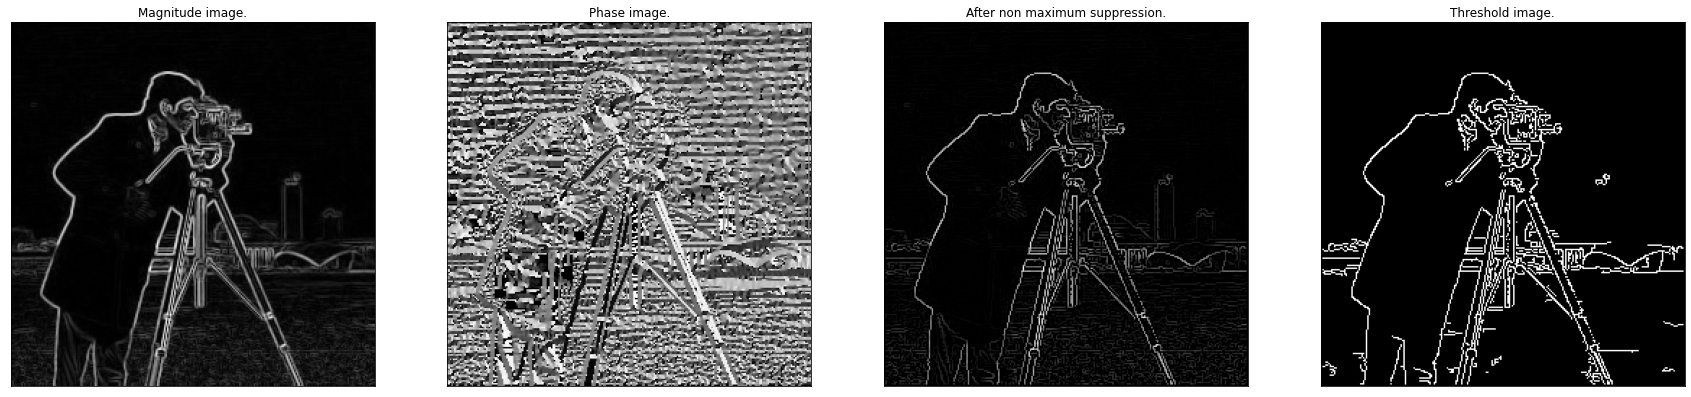

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

Im = cv2.imread('./images/cameraman.jpg', cv2.IMREAD_GRAYSCALE)

t_low = 100
t_high = 250
I_edges = my_cannyAlgorithm(Im, t_low, t_high)


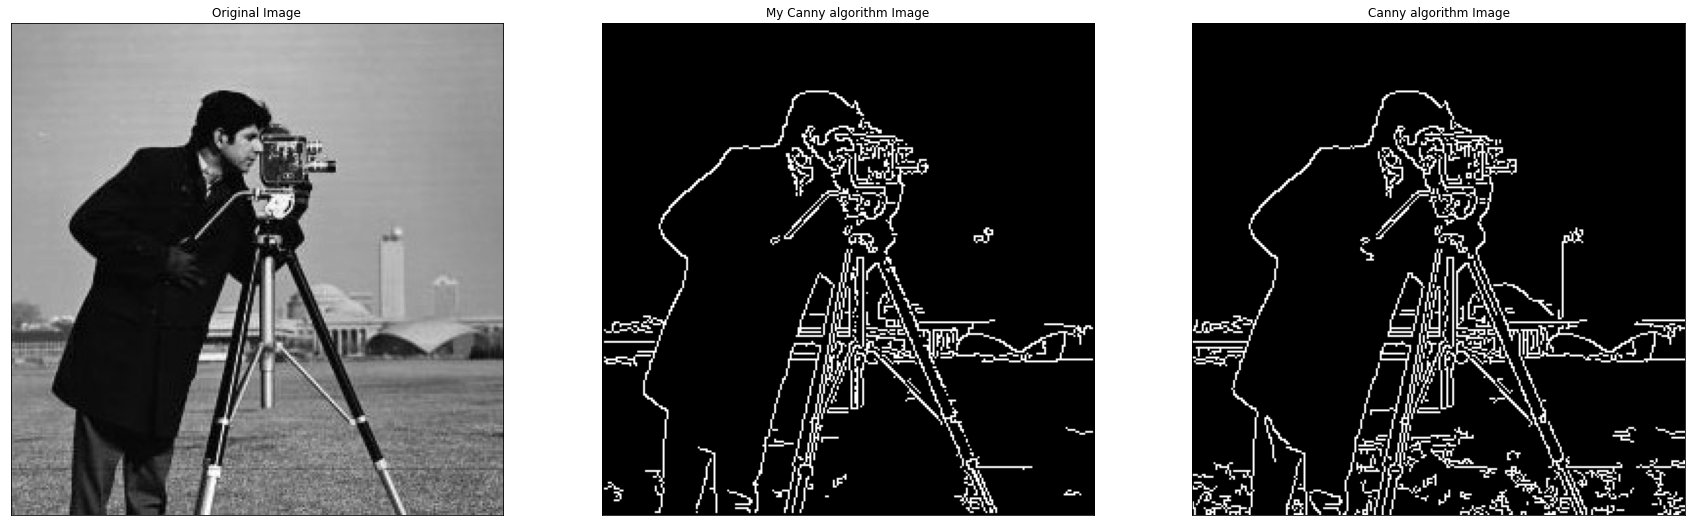

In [6]:
# LOCKED cell: useful to check and visualize the results.

plt.figure(figsize=(30,30))
plt.subplot(131), plt.imshow(Im, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_edges, cmap='gray')
plt.title('My Canny algorithm Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.Canny(Im,t_low, t_high, L2gradient=False), cmap='gray')
plt.title('Canny algorithm Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Problem 2

One of the most popular approaches to feature detection is the **Harris corner detector**, after a work of Chris Harris and Mike Stephens from 1988.

**a)** Use the function in opencv `cv2.cornerHarris(...)` ([Documentation](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)) with `blockSize=3, ksize=3, k=0.04` with the **./images/chessboard.png** image to detect the corners (you can find the image on CANVAS).

In [7]:
# reference
# https://answers.opencv.org/question/186538/to-find-the-coordinates-of-corners-detected-by-harris-corner-detection/

import cv2
import numpy as np
import matplotlib.pyplot as plt


def harrisCornerDetector(fileName):
    
    img = cv2.imread(fileName)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 3, 3, 0.04)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), criteria)
    # drawing
    # res = np.hstack((centroids,corners))
    # res = np.int0(res)
    # img[res[:,1],res[:,0]]=[0,0,255]
    # img[res[:,3],res[:,2]] = [0,255,0]
    p = np.delete(corners, 0, axis=0)
    cornersInt = p.astype(int)
    
    return img, cornersInt
    

def printImage(image, title, cornerPoints, drawMarkerSize, drawMarkerThickness, figureWidth, figureHeight):
    
    for x, y in cornerPoints:
        plotImage = cv2.drawMarker(image, (x, y), (255, 0, 0), markerSize=drawMarkerSize, thickness=drawMarkerThickness)
    plt.figure(figsize=(figureWidth, figureHeight))
    plt.title('Image: ' + title)
    plt.imshow(plotImage)
    plt.show()
    

fileName = './images/chessboard.png'
image, cornerPoints = harrisCornerDetector(fileName)

print('Corner points are: \n', cornerPoints)


Corner points are: 
 [[ 383  383]
 [ 767  383]
 [1151  383]
 [1535  383]
 [ 383  767]
 [ 767  767]
 [1151  767]
 [1535  767]
 [ 383 1151]
 [ 767 1151]
 [1151 1151]
 [1535 1151]
 [ 383 1535]
 [ 767 1535]
 [1151 1535]
 [1535 1535]]


**b)** Plot the image with the detected corners found.

**Hint**: Use the function `cv2.drawMarker(...)` ([Documentation](https://docs.opencv.org/trunk/d6/d6e/group__imgproc__draw.html#ga644c4a170d4799a56b29f864ce984b7e)) to show the corners in the image.

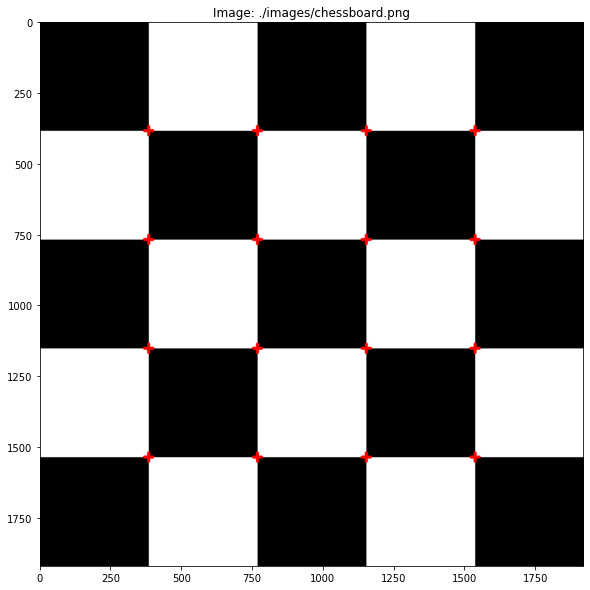

In [8]:
printImage(image, fileName, cornerPoints, drawMarkerSize=30, drawMarkerThickness=10, figureWidth=15, figureHeight=10)

**c)** Detect the corners using the images **./images/arrow_1.jpg**, **./images/arrow_2.jpg** and **./images/arrow_3.jpg**; describe and compare the results in the three images.

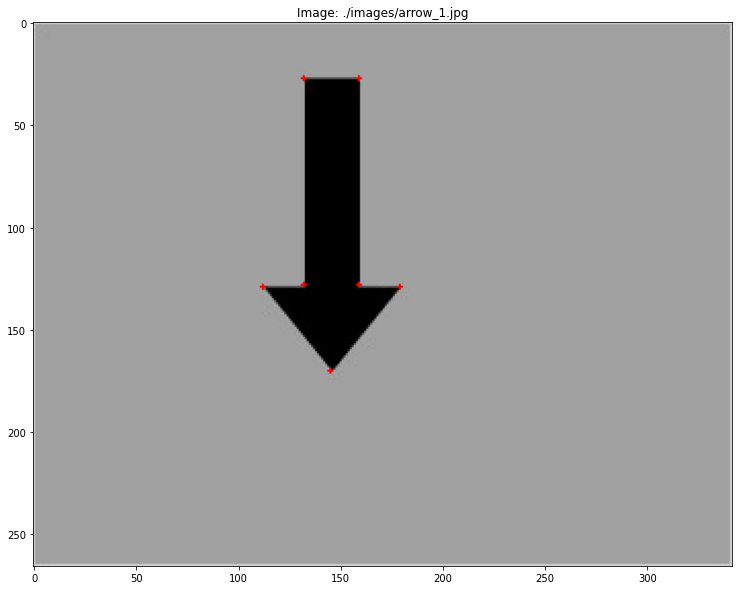

In [9]:
fileNameArrow1 = './images/arrow_1.jpg'
imageArrow1, cornerPoints = harrisCornerDetector(fileNameArrow1)
printImage(imageArrow1, fileNameArrow1, cornerPoints, drawMarkerSize=2, drawMarkerThickness=1, figureWidth=15, figureHeight=10)

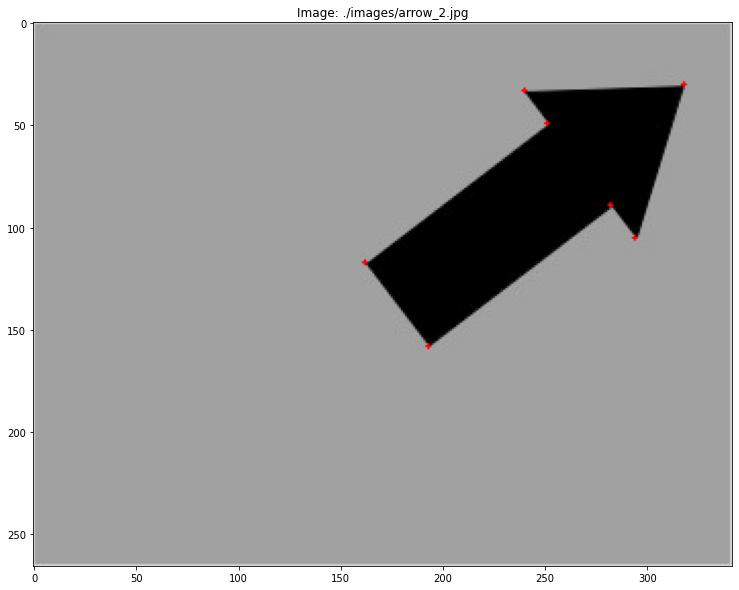

In [10]:
fileNameArrow2 = './images/arrow_2.jpg'
imageArrow2, cornerPoints = harrisCornerDetector(fileNameArrow2)
printImage(imageArrow2, fileNameArrow2, cornerPoints, drawMarkerSize=2, drawMarkerThickness=1, figureWidth=15, figureHeight=10)

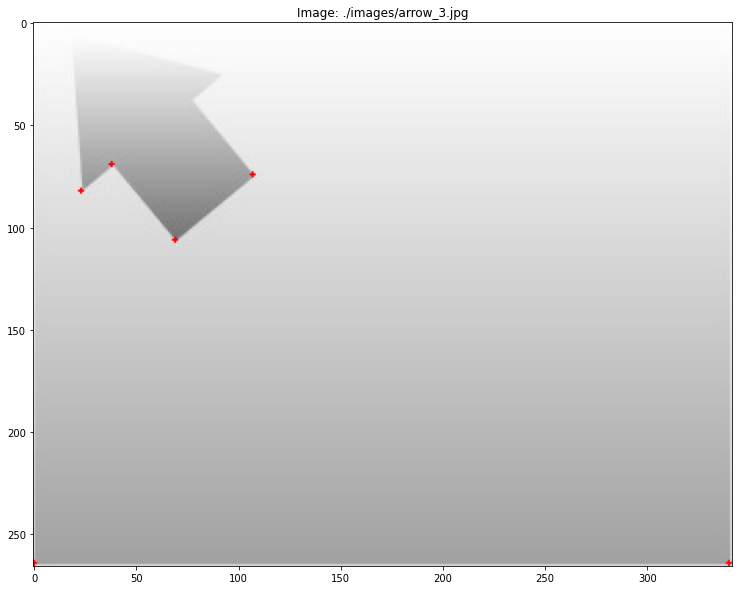

In [11]:
fileNameArrow3 = './images/arrow_3.jpg'
imageArrow3, cornerPoints = harrisCornerDetector(fileNameArrow3)
printImage(imageArrow3, fileNameArrow3, cornerPoints, drawMarkerSize=2, drawMarkerThickness=1, figureWidth=15, figureHeight=10)

**d)** What happen if you change (increase/decrease) the `k` constant for the "corner points"? 


In [12]:
# We can affect this step using the k parameter, which allows us to trade-off precision and recall. So, with a larger k, we 
# will obtain fewer false corners but miss more actual ones (high accuracy); with a lower k, we will get a lot more corners 
# but miss fewer true ones (low precision); with a smaller k, we will get a lot more corners but miss fewer true ones but get 
# a lot of false ones (low precision) (high recall).

# k to be Harris detector free parameter in the equation

# Problem 3 

**a)** What is the SIFT approach? Describe the steps involved.

In [13]:
# reference
# https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
# https://en.wikipedia.org/wiki/Scale-invariant_feature_transform
# https://ieeexplore.ieee.org/document/790410


# In Computer Vision, the Scale Invariant Feature Transform (SIFT) is a feature detection approach. SIFT assists in locating 
# the image's local features, often known as the image's 'keypoints.' These keypoints are scale and rotation invariants that 
# can be utilized for picture matching, object detection, and scene detection in computer vision applications. It was published 
# in 1999 by David Lowe.

# There are mainly four steps involved in the SIFT algorithm.
# Scale-invariant feature detection: Potential location for finding features and make sure that features are scale-independent.
# Keypoint Localization: Identifying the suitable features or keypoints.
# Orientation Assignment: Assigning orientation to keypoints.
# Keypoint descriptor: Assign a unique fingerprint to each keypoint.

**b)** Why this approach is more popular than the Harris detector?

In [14]:
# SIFT is a more effective and useful approach than Harris corner detection. The matching keypoint point from Harris detection
# can take a long time to achieve, and it is difficult to obtain a very accurate and perfect match keypoint. We can acquire 
# high exactness and robustness match keypoints by employing SIFT characteristics. We find likely keypoint matches for the 
# SIFT approach, which is based on extracting invariant scale features, and then for the Harris corner detection algorithm. 
# In almost all types of photos, SIFT outperforms Harris corner detection.

**c)** Explain the difference between a feature detector and a feature descriptor.

In [15]:
# reference
# https://www.vlfeat.org/overview/sift.html

# SIFT includes a feature detector and a feature descriptor in one package. The feature detector extracts some frames from 
# an image that are consistent with various lighting, viewpoint, and other viewing situations. The feature descriptor assigns 
# a signature to the regions that recognizes their compact and sturdy look.


### Delivery (dead line) on CANVAS: 17.10.2021 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.